In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from skimage import io

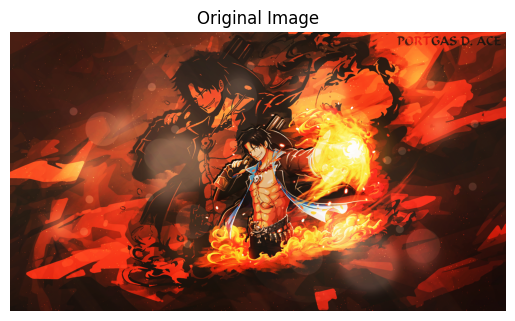

In [ ]:
image_path = "image.jpg"
image = io.imread(image_path)

plt.imshow(image)
plt.title("Original Image")
plt.axis("off")
plt.show()

### Prepare Image for K-Means

In [4]:
pixels = image.reshape(-1, 3)
pixels = pixels / 255.0   # normalize

### Apply K-Means (K = 32 for Better quality)

In [5]:
k = 32
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(pixels)

KMeans(n_clusters=32, random_state=42)

### Compress Image

In [6]:
compressed_pixels = kmeans.cluster_centers_[kmeans.labels_]
compressed_image = compressed_pixels.reshape(image.shape)

In [ ]:
output_dir = "output"
os.makedirs(output_dir, exist_ok=True)

compressed_uint8 = (compressed_image * 255).astype(np.uint8)
compressed_path = f"{output_dir}/compressed_k_32.jpg"

io.imsave(compressed_path, compressed_uint8)


In [8]:
original_size_kb = os.path.getsize(image_path) / 1024
compressed_size_kb = os.path.getsize(compressed_path) / 1024
print(f"Original Image Size   : {original_size_kb:.2f} KB")
print(f"Compressed Image Size : {compressed_size_kb:.2f} KB")

Original Image Size   : 6411.75 KB
Compressed Image Size : 839.43 KB


### Side-by-Side Comparison

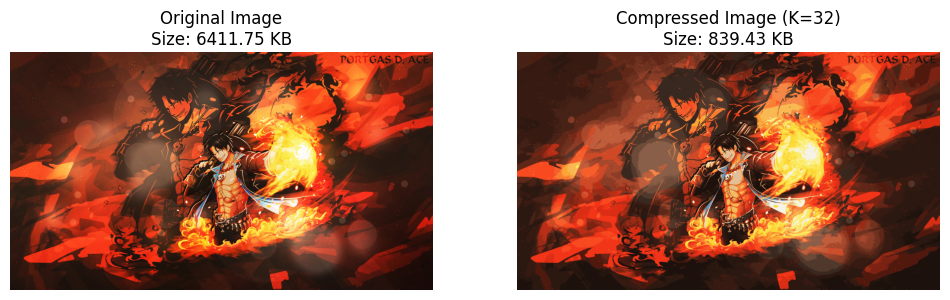

In [9]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.imshow(image)
plt.title(f"Original Image\nSize: {original_size_kb:.2f} KB")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(compressed_image)
plt.title(f"Compressed Image (K=32)\nSize: {compressed_size_kb:.2f} KB")
plt.axis("off")

plt.show()